# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Mounting Drive Kedalam Notebook untuk mengimpor dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/CSV 9/hasil_clustering.csv'
df = pd.read_csv(file_path)
df.head(30)


Mounted at /content/drive


,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform,KMeans_Label
0,41.49,29.02,3.77,8.46,82.74,Wii,1
1,29.08,3.58,6.81,0.77,40.24,NES,0
2,15.85,12.88,3.79,3.31,35.82,Wii,1
3,15.75,11.01,3.28,2.96,33.00,Wii,1
4,11.27,8.89,10.22,1.00,31.37,GB,2
5,23.20,2.26,4.22,0.58,30.26,GB,2
6,11.38,9.23,6.50,2.90,30.01,DS,2
7,14.03,9.20,2.93,2.85,29.02,Wii,1
8,14.59,7.06,4.70,2.26,28.62,Wii,1
9,26.93,0.63,0.28,0.47,28.31,NES,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
#Standarisasi data dan label encoding
scaler = StandardScaler()
df[['eu_sales', 'na_sales', 'other_sales', 'global_sales']] = scaler.fit_transform(df[['eu_sales','na_sales', 'other_sales', 'global_sales']])

le = LabelEncoder()
df['platform'] = le.fit_transform(df['platform'])

# Memisahkan fitur dan label
X = df.drop('KMeans_Label', axis=1)
y = df['KMeans_Label']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menyamakan kolom antara X_train dan X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
print('Data uji:', X_test.shape, y_test.shape)
print('Data latih:', X_train.shape, y_train.shape)

Data uji: (2442, 6) (2442,)
Data latih: (9767, 6) (9767,)


In [4]:
X.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform
0,43.829925,49.537756,3.77,38.566988,45.966194,26
1,30.610632,5.820657,6.81,3.244960,22.154530,11
2,16.517865,21.802143,3.79,14.911794,19.678117,26
3,16.411343,18.588662,3.28,13.304159,18.098144,26
4,11.639189,14.945570,10.22,4.301406,17.184896,5


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Melatih model dengan data yang sudah diproses
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")


Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[4452    0    3]
 [   0 2687    0]
 [   1    0 2624]]
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9996
F1-Score: 0.9996

----------------------------------------



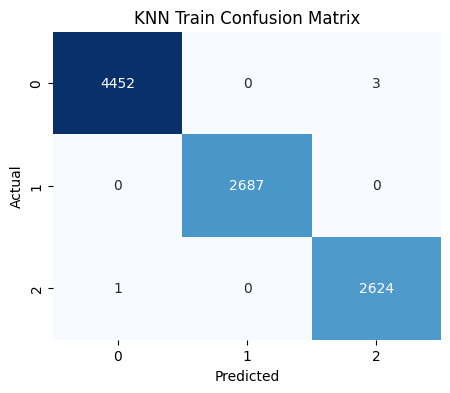

In [6]:
# K-Nearest Neighbors Train (KNN)
y_pred_knn_train = knn.predict(X_train)
cm_knn_train = confusion_matrix(y_train, y_pred_knn_train)
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn_train)
print(f"Accuracy: {accuracy_score(y_train, y_pred_knn_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_knn_train, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_knn_train, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_knn_train, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== KNN Classifier ====
Confusion Matrix:
[[1123    0    1]
 [   1  666    0]
 [   0    0  651]]
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992
F1-Score: 0.9992

----------------------------------------



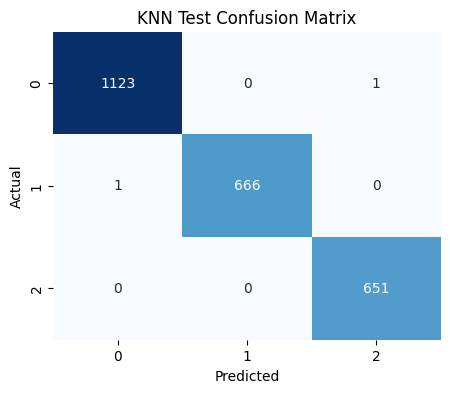

In [7]:
# K-Nearest Neighbors Test(KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[4415    0   40]
 [   5 2682    0]
 [   1    0 2624]]
Accuracy: 0.9953
Precision: 0.9953
Recall: 0.9953
F1-Score: 0.9953

----------------------------------------



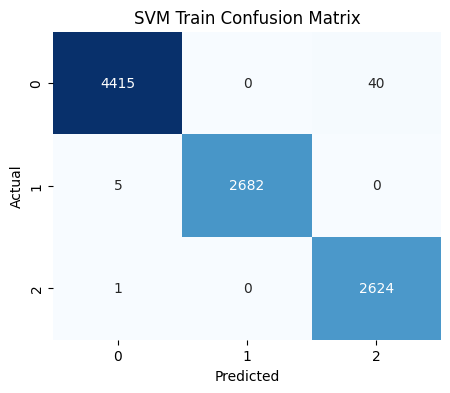

In [8]:
# Support Vector Machine Train (SVM)
y_pred_svm_train = svm.predict(X_train)
cm_svm_train = confusion_matrix(y_train, y_pred_svm_train)
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm_train)
print(f"Accuracy: {accuracy_score(y_train, y_pred_svm_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_svm_train, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_svm_train, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_svm_train, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[1110    0   14]
 [   1  666    0]
 [   0    0  651]]
Accuracy: 0.9939
Precision: 0.9940
Recall: 0.9939
F1-Score: 0.9939

----------------------------------------



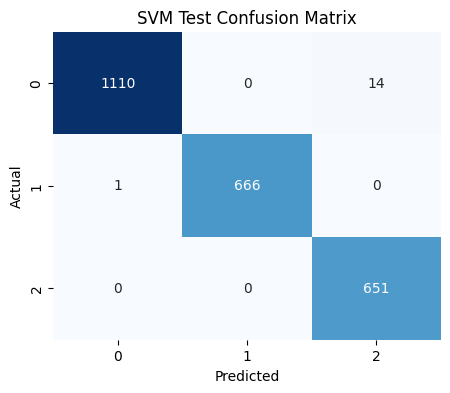

In [9]:
# Support Vector Machine Test (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[4395    0   60]
 [  23 2659    5]
 [   2    0 2623]]
Accuracy: 0.9908
Precision: 0.9909
Recall: 0.9908
F1-Score: 0.9908

----------------------------------------



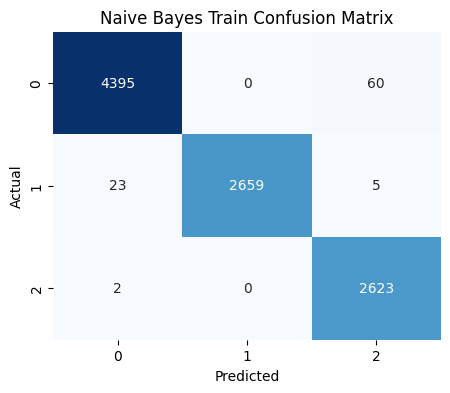

In [10]:
# Naive Bayes Train
y_pred_nb_train = nb.predict(X_train)
cm_nb_train = confusion_matrix(y_train, y_pred_nb_train)
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb_train)
print(f"Accuracy: {accuracy_score(y_train, y_pred_nb_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_nb_train, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_nb_train, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_nb_train, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[1108    0   16]
 [   4  661    2]
 [   0    0  651]]
Accuracy: 0.9910
Precision: 0.9912
Recall: 0.9910
F1-Score: 0.9910

----------------------------------------



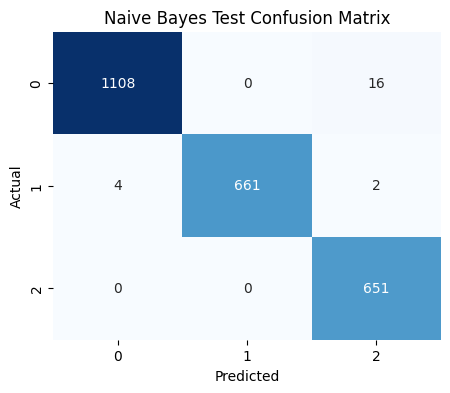

In [11]:
# Naive Bayes Test
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        'Train': {
            'Confusion Matrix': confusion_matrix(y_train, y_train_pred),
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'Precision': precision_score(y_train, y_train_pred, average='weighted'),
            'Recall': recall_score(y_train, y_train_pred, average='weighted'),
            'F1-Score': f1_score(y_train, y_train_pred, average='weighted')
        },
        'Test': {
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred),
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred, average='weighted'),
            'Recall': recall_score(y_test, y_test_pred, average='weighted'),
            'F1-Score': f1_score(y_test, y_test_pred, average='weighted')
        }
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_train, y_train, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_train, y_train, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_train, y_train, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, data in results.items():
    for dataset, metrics in data.items():
        rows.append({
            'Model': model_name,
            'Data': dataset,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1-Score': metrics['F1-Score']
        })

summary_df = pd.DataFrame(rows)

print(summary_df)


                          Model   Data  Accuracy  Precision    Recall  \
0     K-Nearest Neighbors (KNN)  Train  0.999590   0.999591  0.999590   
1     K-Nearest Neighbors (KNN)   Test  0.999181   0.999182  0.999181   
2  Support Vector Machine (SVM)  Train  0.995290   0.995345  0.995290   
3  Support Vector Machine (SVM)   Test  0.993857   0.993973  0.993857   
4              Naive Bayes (NB)  Train  0.990785   0.990921  0.990785   
5              Naive Bayes (NB)   Test  0.990991   0.991172  0.990991   

   F1-Score  
0  0.999590  
1  0.999181  
2  0.995296  
3  0.993870  
4  0.990801  
5  0.991014  


## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi, berikut adalah analisis performa masing-masing model berdasarkan metrik Accuracy, Precision, Recall, dan F1-Score untuk data Train dan Test.
1. **K-Nearest Neighbors (KNN)**

    Train:
        Accuracy: 99.96%
        Precision: 99.96%
        Recall: 99.96%
        F1-Score: 99.96%
    Test:
        Accuracy: 99.92%
        Precision: 99.92%
        Recall: 99.92%
        F1-Score: 99.92%

  Analisis:

  KNN menunjukkan performa yang sangat tinggi dengan akurasi hampir sempurna baik pada data train maupun test. Tidak ada indikasi overfitting yang signifikan karena selisih antara performa train dan test sangat kecil. Model ini memiliki keseimbangan precision dan recall yang sangat baik.
___

2. **Support Vector Machine (SVM)**

    Train:
        Accuracy: 99.53%
        Precision: 99.53%
        Recall: 99.53%
        F1-Score: 99.53%
    Test:
        Accuracy: 99.39%
        Precision: 99.40%
        Recall: 99.39%
        F1-Score: 99.39%

Analisis:

SVM juga menunjukkan performa yang sangat baik dengan perbedaan kecil antara data train dan test. Ini menunjukkan bahwa model cukup stabil dan mampu melakukan generalisasi dengan baik.
___
3. **Naive Bayes (NB)**

    Train:
        Accuracy: 99.08%
        Precision: 99.09%
        Recall: 99.08%
        F1-Score: 99.08%
    Test:
        Accuracy: 99.10%
        Precision: 99.12%
        Recall: 99.10%
        F1-Score: 99.10%

Analisis:

Naive Bayes memiliki performa yang sedikit lebih rendah dibandingkan KNN dan SVM. Namun, perbedaan hasil antara data train dan test sangat kecil, yang menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting.
___
## Kesimpulan:

  - KNN memiliki performa terbaik dengan akurasi, precision, recall, dan F1-Score tertinggi, baik pada data train maupun test. Model ini sangat direkomendasikan jika akurasi tinggi menjadi prioritas utama.
  - SVM juga merupakan pilihan yang solid, dengan performa yang stabil dan selisih kecil antara train dan test, menunjukkan generalisasi yang baik.
  - Naive Bayes memiliki akurasi yang lebih rendah dibandingkan model lain, tetapi tetap menunjukkan performa yang konsisten dan stabil antara train dan test.
  
___
## Rekomendasi:

Jika tujuan utama adalah mendapatkan model dengan akurasi tertinggi, maka KNN adalah pilihan terbaik. Namun, jika menginginkan model yang lebih ringan dan tetap stabil, SVM bisa menjadi alternatif yang baik.
